In [49]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [50]:
# Import important libraries that will be used in the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Step 1: Reading and Understanding the Data

In [51]:
# Read the given CSV file, and view some sample records
#index_col=0 is to not consider the index column as data column
df = pd.read_csv('Cars_Dataset.csv', index_col=0)
df.head()

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [52]:
df.shape

(8015, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8015 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car Name  8014 non-null   object 
 1   Year      8014 non-null   float64
 2   Distance  8015 non-null   int64  
 3   Owner     8015 non-null   int64  
 4   Fuel      8015 non-null   object 
 5   Location  7802 non-null   object 
 6   Drive     8015 non-null   object 
 7   Type      8015 non-null   object 
 8   Price     8015 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 626.2+ KB


In [54]:
#list to store the two types of columns 
numrical_columns= [] 
categorical_columns= [] 
#Iterate through each column in the dataframe
for column in df.columns:
    #check if numrical, if ture appemd to numrical_columns lit
    if df[column].dtype in ['int64', 'float65']:
         numrical_columns.append(column)
         
    else:
        #otherwise, it's categorical
         categorical_columns.append(column)      
#print the columnslts    
print("Numrical Columns: ",numrical_columns)
print("Categorical Columns: ",categorical_columns)

Numrical Columns:  ['Distance', 'Owner', 'Price']
Categorical Columns:  ['Car Name', 'Year', 'Fuel', 'Location', 'Drive', 'Type']


In [55]:
#list to store the two types of columns values
continous_columns= [] 
discrete_columns= [] 
#Iterate through each column in the dataframe
for column in df.columns:
    unique_values= df[column].nunique()
    #if column has more than 10 unique values, we consider it continous
    if unique_values>10:
         continous_columns.append(column)
    else:
        #otherwise, it's discrete
         discrete_columns.append(column)   
#print the columnslts    
print("Continous Columns: ",continous_columns)
print("Discrete Columns: ",discrete_columns)

Continous Columns:  ['Car Name', 'Year', 'Distance', 'Location', 'Price']
Discrete Columns:  ['Owner', 'Fuel', 'Drive', 'Type']


In [56]:
#count the number of null values
df.isnull().sum()

Car Name      1
Year          1
Distance      0
Owner         0
Fuel          0
Location    213
Drive         0
Type          0
Price         0
dtype: int64

In [57]:
# Drop rows with missing values in key numeric columns
df = df.dropna(subset=['Year','Distance','Owner','Fuel','Drive','Type','Price'])

In [58]:
#remove duplicated rows
df = df.drop_duplicates()

In [59]:
# Extract car brand 
df['Brand'] = df['Car Name'].str.split().str[0]

#count number of cars from each brand
df['Brand'].value_counts()

Brand
Maruti        3433
Hyundai       2008
Honda          829
Renault        385
Tata           350
Volkswagen     182
Ford           175
Toyota         173
Mahindra       153
Datsun         110
Skoda           74
KIA             65
Nissan          64
Jeep             9
MG               3
BMW              1
Name: count, dtype: int64

In [60]:
# Filter rows where the 'Brand' is 'Hyundai'
df = df[df['Brand'] == 'Hyundai']
df['Car Name'].value_counts()

Car Name
Hyundai Grand i10         451
Hyundai Elite i20         382
Hyundai i10               194
Hyundai Verna             156
Hyundai Creta             140
Hyundai NEW SANTRO        120
Hyundai i20               102
Hyundai Eon                98
Hyundai GRAND I10 NIOS     80
Hyundai VENUE              73
Hyundai Xcent              50
Hyundai NEW I20            42
Hyundai AURA               33
Hyundai Santro Xing        29
Hyundai i20 Active         24
Hyundai New Elantra        18
Hyundai Tucson New          7
Hyundai ALCAZAR             5
Hyundai NEW I20 N LINE      3
Hyundai Sonata              1
Name: count, dtype: int64

In [61]:
# choose 
df = df[df['Car Name'].isin(['Hyundai Grand i10', 'Hyundai Elite i20 ', 'Hyundai i10', 'Hyundai i20', 'Hyundai NEW I20', 'Hyundai i20 Active', 'Hyundai NEW I20 N LINE'])]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 6 to 7995
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car Name  816 non-null    object 
 1   Year      816 non-null    float64
 2   Distance  816 non-null    int64  
 3   Owner     816 non-null    int64  
 4   Fuel      816 non-null    object 
 5   Location  785 non-null    object 
 6   Drive     816 non-null    object 
 7   Type      816 non-null    object 
 8   Price     816 non-null    int64  
 9   Brand     816 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 70.1+ KB


In [63]:
df = pd.get_dummies(df, columns=['Fuel','Type', 'Brand', 'Drive'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 6 to 7995
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car Name         816 non-null    object 
 1   Year             816 non-null    float64
 2   Distance         816 non-null    int64  
 3   Owner            816 non-null    int64  
 4   Location         785 non-null    object 
 5   Price            816 non-null    int64  
 6   Fuel_CNG         816 non-null    bool   
 7   Fuel_DIESEL      816 non-null    bool   
 8   Fuel_LPG         816 non-null    bool   
 9   Fuel_PETROL      816 non-null    bool   
 10  Type_HatchBack   816 non-null    bool   
 11  Brand_Hyundai    816 non-null    bool   
 12  Drive_Automatic  816 non-null    bool   
 13  Drive_Manual     816 non-null    bool   
dtypes: bool(8), float64(1), int64(3), object(2)
memory usage: 51.0+ KB


In [64]:
df.drop(columns=['Fuel_PETROL', 'Fuel_LPG', 'Fuel_CNG', 'Brand_Hyundai', 'Drive_Manual','Location', 'Car Name', 'Type_HatchBack'], inplace=True)
#reset the index of rows to the right ordering
df.reset_index(drop=True)


,Year,Distance,Owner,Price,Fuel_DIESEL,Drive_Automatic
0,2012.0,103781,1,278000,False,False
1,2015.0,39950,1,443000,False,False
2,2017.0,71686,1,417000,False,False
3,2017.0,75370,1,468000,False,False
4,2017.0,35775,1,515000,False,False
...,...,...,...,...,...,...
811,2015.0,110190,1,316000,False,False
812,2019.0,69561,2,566000,False,False
813,2013.0,58466,1,385000,False,True
814,2010.0,46719,2,161000,False,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 6 to 7995
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             816 non-null    float64
 1   Distance         816 non-null    int64  
 2   Owner            816 non-null    int64  
 3   Price            816 non-null    int64  
 4   Fuel_DIESEL      816 non-null    bool   
 5   Drive_Automatic  816 non-null    bool   
dtypes: bool(2), float64(1), int64(3)
memory usage: 33.5 KB


In [66]:
df.describe()

,Year,Distance,Owner,Price
count,816.000000,816.000000,816.000000,8.160000e+02
mean,2015.122549,55864.348039,1.404412,4.381259e+05
std,2.933986,26007.189820,0.571881,1.593113e+05
min,2010.000000,1830.000000,1.000000,1.480000e+05
25%,2013.000000,35526.750000,1.000000,3.260000e+05
50%,2015.000000,54851.500000,1.000000,4.390000e+05
75%,2017.000000,73653.250000,2.000000,5.160000e+05
max,2022.000000,125412.000000,3.000000,1.185000e+06


## Step 2: Visualising the Data

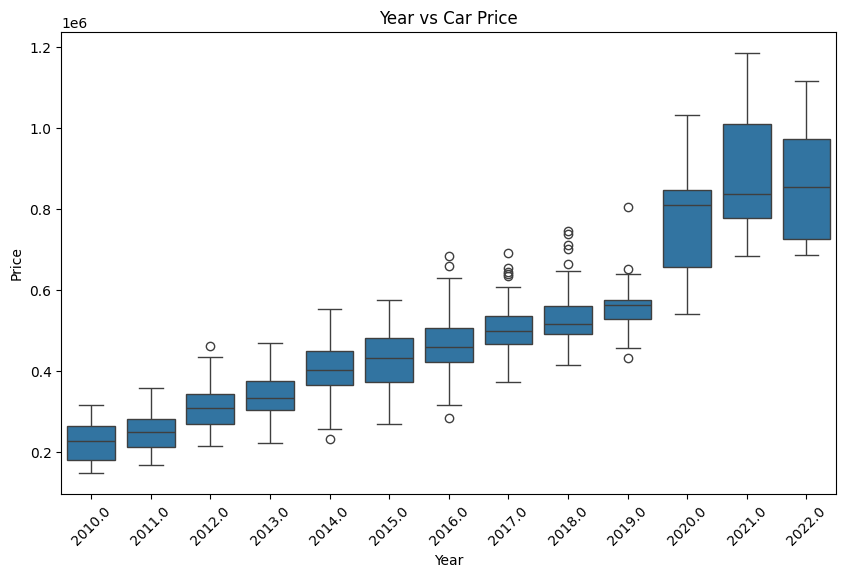

In [67]:
#This boxplot visualizes the distribution of car prices across different years
plt.figure(figsize=(10,6))
sns.boxplot(x='Year', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Year vs Car Price")
plt.show()


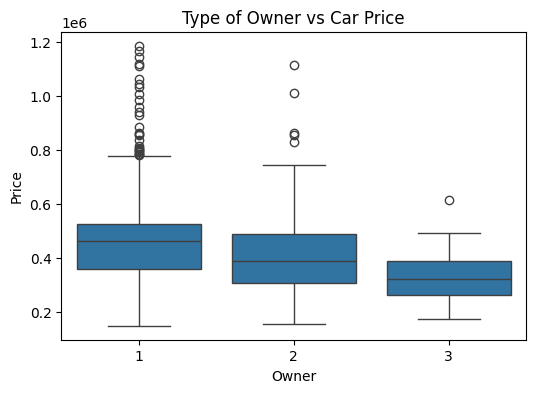

In [68]:
#This boxplot visualizes the distribution of car prices across different type of owners
plt.figure(figsize=(6,4))
sns.boxplot(x='Owner', y='Price', data=df)
plt.title("Type of Owner vs Car Price")
plt.show()

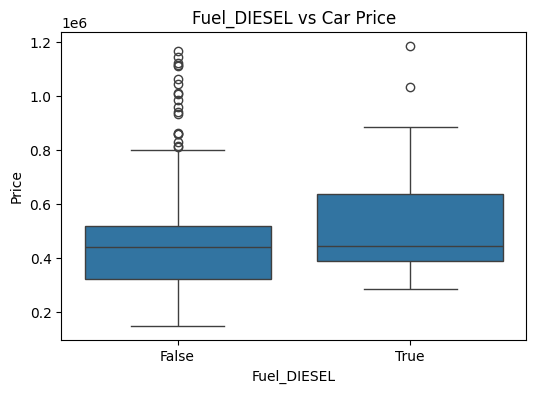

In [69]:
#This boxplot visualizes the distribution of car prices depending on the fuel type
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_DIESEL', y='Price', data=df)
plt.title("Fuel_DIESEL vs Car Price")
plt.show()

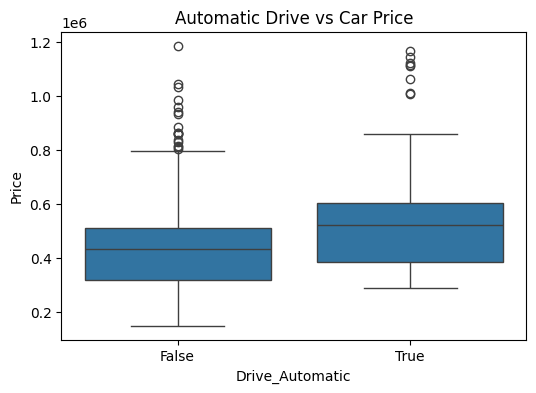

In [70]:
#This boxplot visualizes the distribution of car prices depending on the transmission type
plt.figure(figsize=(6,4))
sns.boxplot(x='Drive_Automatic', y='Price', data=df)
plt.title("Automatic Drive vs Car Price")
plt.show()

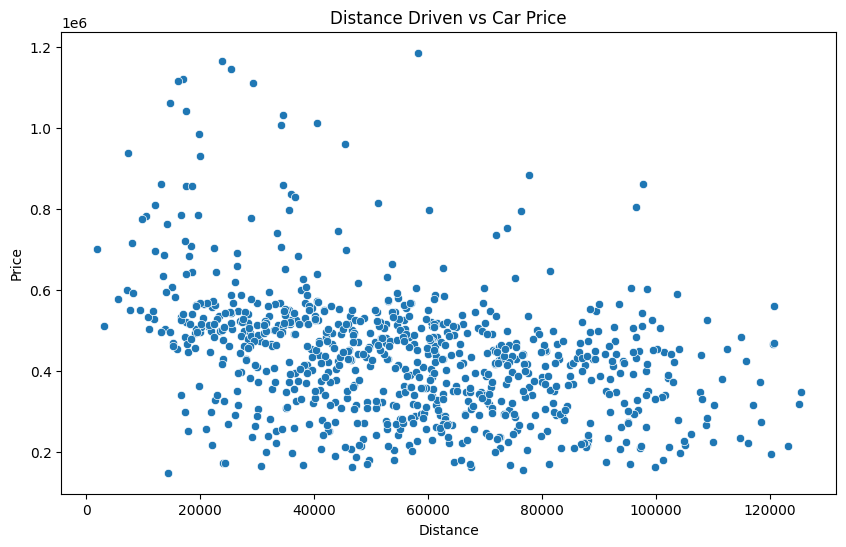

In [71]:
#This scatterplot visualizes the distribution of car prices across different distances driven
plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title("Distance Driven vs Car Price")
plt.show()


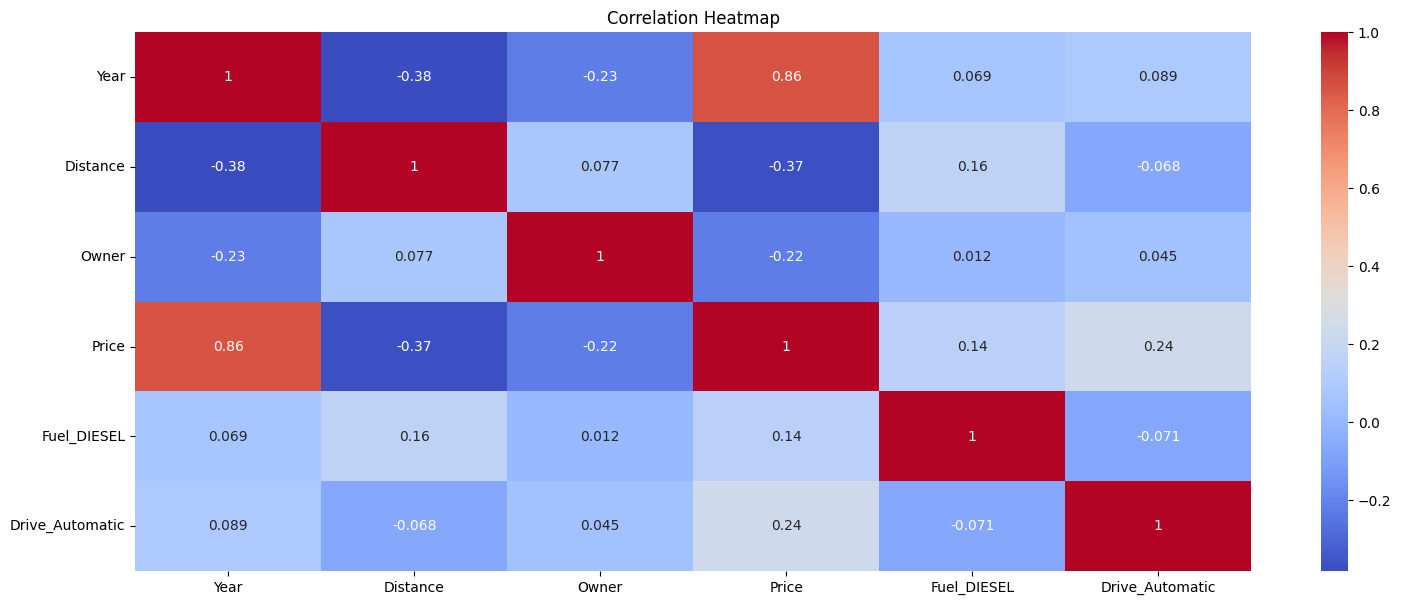

In [72]:
#Displays a heatmap showing the strength and direction of correlations between features.
plt.figure(figsize=(18,7))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [73]:
#Displays features most positively or negatively correlated with car price.
print(correlation["Price"].sort_values(ascending=False))

Price              1.000000
Year               0.859264
Drive_Automatic    0.237401
Fuel_DIESEL        0.141960
Owner             -0.222952
Distance          -0.370483
Name: Price, dtype: float64


## Step 3: Performing Simple Linear Regression


#### Train-Test Split

In [74]:
#selected the year feature to be trained for the model
X = df['Year']
y = df['Price']

In [75]:
#splits the dataset into training (80%) and testing (20%) sets with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [76]:
X_train.head()

1211    2020.0
2590    2018.0
2066    2012.0
1127    2015.0
7723    2013.0
Name: Year, dtype: float64

In [77]:
y_train.head()

1211    837000
2590    510000
2066    257000
1127    454000
7723    437000
Name: Price, dtype: int64

### Building a Linear Model (statsmodel)

In [78]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [79]:
lr.params

const   -9.440871e+07
Year     4.706848e+04
dtype: float64

In [80]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1842.
Date:                Sun, 18 May 2025   Prob (F-statistic):          7.64e-192
Time:                        12:10:50   Log-Likelihood:                -8314.2
No. Observations:                 652   AIC:                         1.663e+04
Df Residuals:                     650   BIC:                         1.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.441e+07   2.21e+06    -42.720      0.0

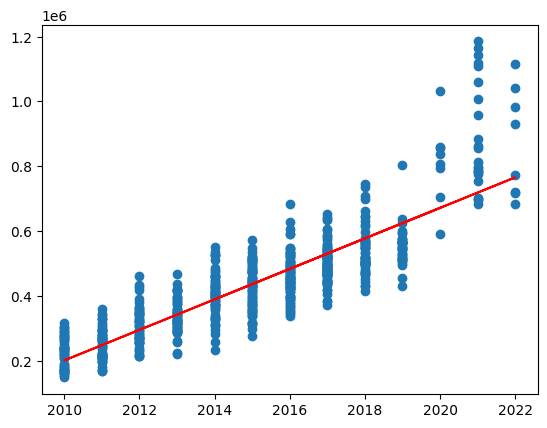

In [81]:
#Plots the training data and overlays the regression line to visualize the model's fit.
plt.scatter(X_train, y_train)
plt.plot(X_train, -9.441e+07 +  4.707e+04 *X_train, 'r')
plt.show()

## Step 4: Residual analysis 

In [82]:
#Calculates the residuals by subtracting predicted values from actual training targets.
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

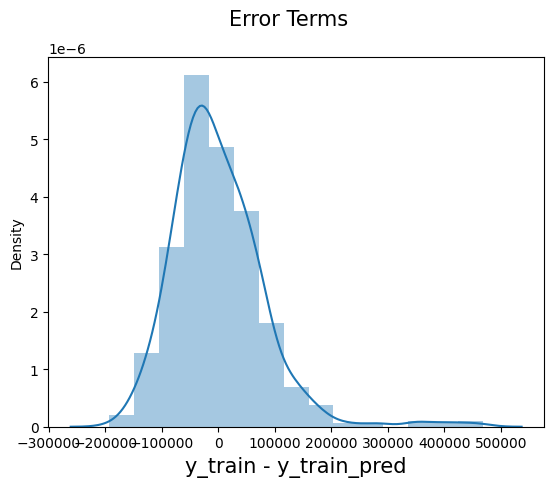

In [83]:
#Plots the distribution of residuals to assess the error pattern and check for normality.
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

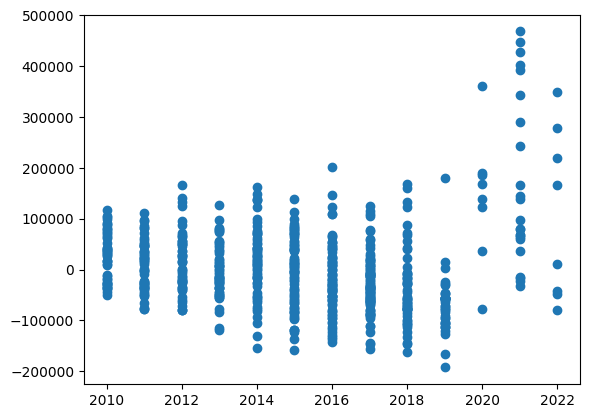

In [84]:
#Displays a residual plot to check for patterns indicating non-linearity or heteroscedasticity.
plt.scatter(X_train,res)
plt.show()

## Step 5: Predictions on the Test Set

In [85]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [86]:
y_pred.head()

3380    434272.162576
1523    622546.075679
3442    198929.771197
227     245998.249473
731     481340.640851
dtype: float64

In [87]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(72730.51194147265)

In [88]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7325458691191352

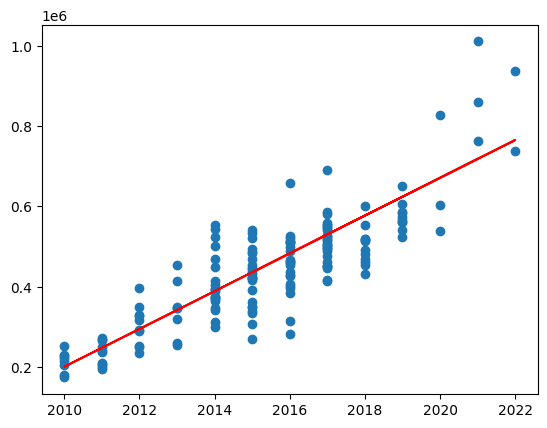

In [89]:
plt.scatter(X_test, y_test)
plt.plot(X_test, -9.441e+07 +  4.707e+04 *X_test, 'r')
plt.show()

### Building a Linear Model (sklearn)

In [90]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)
X_train_lm.shape

(652,)

In [91]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [92]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(652, 1)
(652,)
(164, 1)
(164,)


In [93]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [94]:
print(lm.intercept_)
print(lm.coef_)

-94408711.5630967
[47068.47827577]


In [95]:
#Evaluate the model and do prediction
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7391587610652057
0.7325458691190804
